## Oil Price Analysis

#### Importing necessary libraries

In [1]:
import os
import sys
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [2]:
sys.path.append(os.path.abspath('../scripts'))
from Utils import DataUtils
from Plotting import Plots

data_utils = DataUtils()
plots = Plots()

#### Explanatory data analysis

In [16]:
# Loading data
price = data_utils.load_data('BrentOilPrices.csv')

price_data = price.copy()

price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data['Date'] = price_data['Date'].dt.strftime('%Y-%m-%d')


price_data = price_data.sort_values(by='Date')
price_data = price_data.set_index('Date')

2024-11-03 11:55 - DEBUG :: Loading data from file...
C:\Users\user\AppData\Local\Temp\ipykernel_45308\2362707037.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_data['Date'] = pd.to_datetime(price_data['Date'])


In [5]:
price.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
data_utils.data_info(price)


Dataset Overview
---------------------
- Total rows: 9011
- Total columns: 2

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


,Missing Values,Missing Percentage,Data Types


#### Sesonal decompose

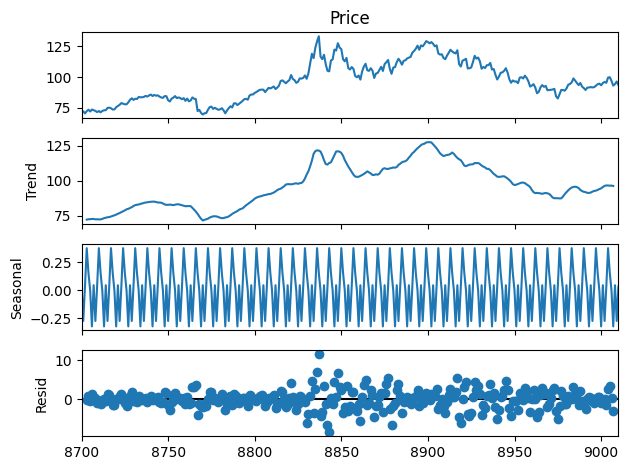

In [ ]:
# Weekly seasonal decompose
plots.plot_seasonal_decompose(8700, 7, price)

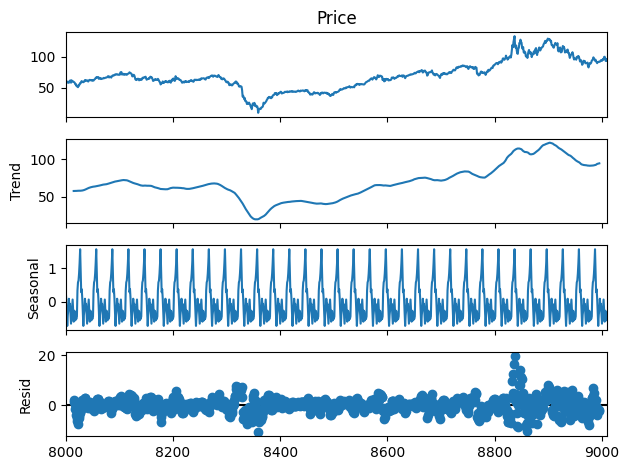

In [5]:
# Monthly seasonal decompose
plots.plot_seasonal_decompose(8000, 30, price)

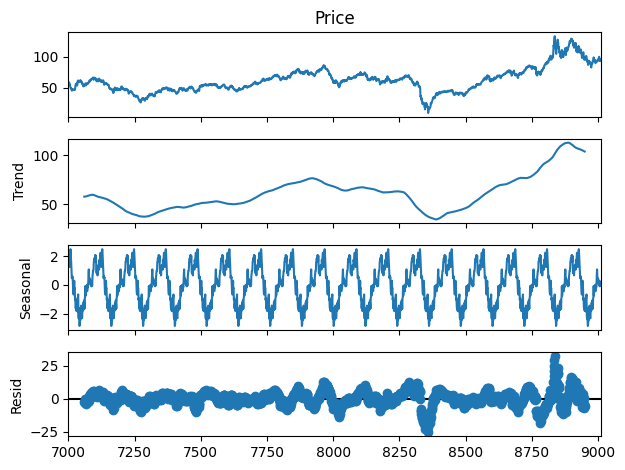

In [9]:
# Quarterly seasonal decompose
plots.plot_seasonal_decompose(7000, 120, price)

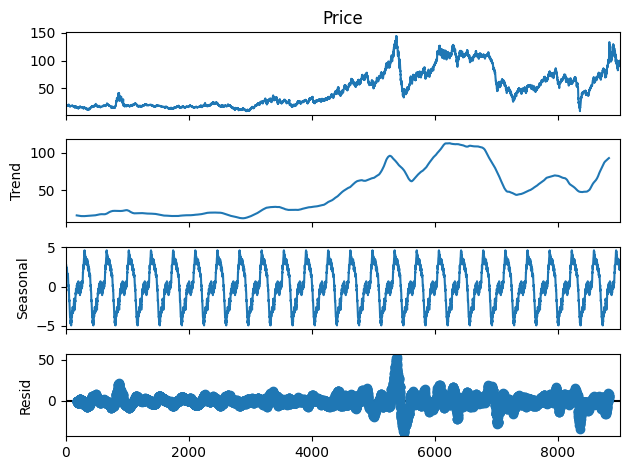

In [ ]:
# Yearly seasonal decompose
plots.plot_seasonal_decompose(0, 360, price)

**Observation**:

* The time series decomposition suggests that the price is influenced by both a long-term upward trend and a strong seasonal pattern. The seasonal component indicates that there are regular fluctuations in the price, possibly related to factors like economic cycles, holidays, or other external factors. The residual component shows that there is some random variation in the data that is not captured by the trend or seasonal components.


#### Autocorrelation 

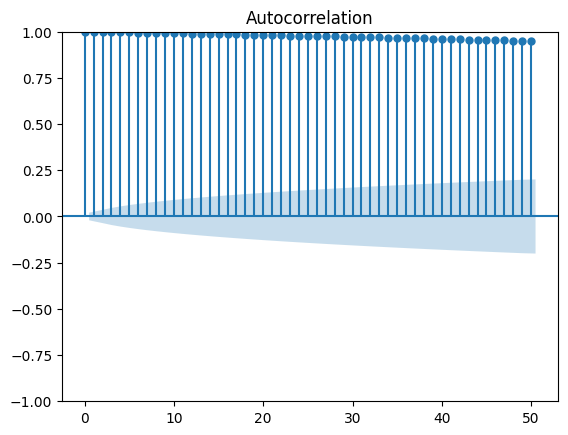

In [ ]:
series = price['Price']
plot_acf(series)
plt.show()

**Key Observations:**
1. High Autocorrelation Across Lags:
    * The values are close to 1 for nearly all lags, indicating a very strong positive correlation between values in the time series across a wide range of lag values. This suggests that past values are strongly related to current values, which is characteristic of non-stationary time series data.

2. No Decline Over Lags:
    * The lack of decline in the autocorrelation values over time also points to non-stationarity. For stationary data, we would expect autocorrelations to drop off or approach zero as lag increases.

3. Confidence Interval:
    * The blue-shaded area represents the confidence interval (often around 95%). Ideally, values within this area are considered statistically insignificant. Here, almost all lags are above the confidence interval, further emphasizing high autocorrelation across the series.

**Interpretation:**
  * This autocorrelation plot indicates that the time series is likely non-stationary, meaning it has trends or patterns that do not stabilize over time. 


#### Partial Autocorrelation

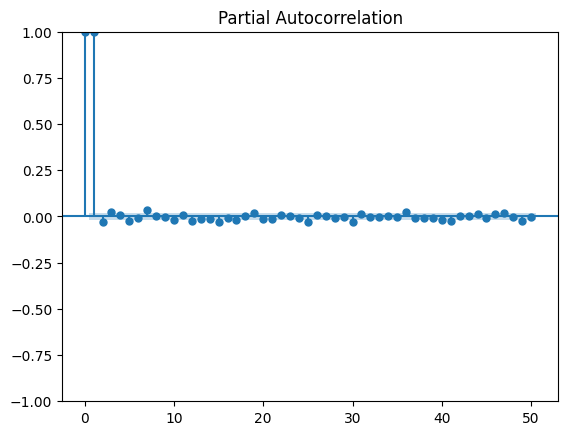

In [24]:
series = price['Price']
plot_pacf(series, lags=50)
plt.show()

**Observation**
- This partial autocorrelation plot (PACF) provides insight into the lagged relationships in your time series data. Here’s an interpretation:

    * Lag 1: The first lag has a strong positive partial autocorrelation close to 1. This suggests that the current value of the series is highly correlated with its immediately preceding value, which could imply a potential AR(1) component in an ARIMA model.

    * Subsequent Lags: After lag 1, the partial autocorrelation quickly drops to near-zero, with no significant spikes at higher lags. This behavior suggests that there’s little to no additional relationship between the current value and values further back in time.

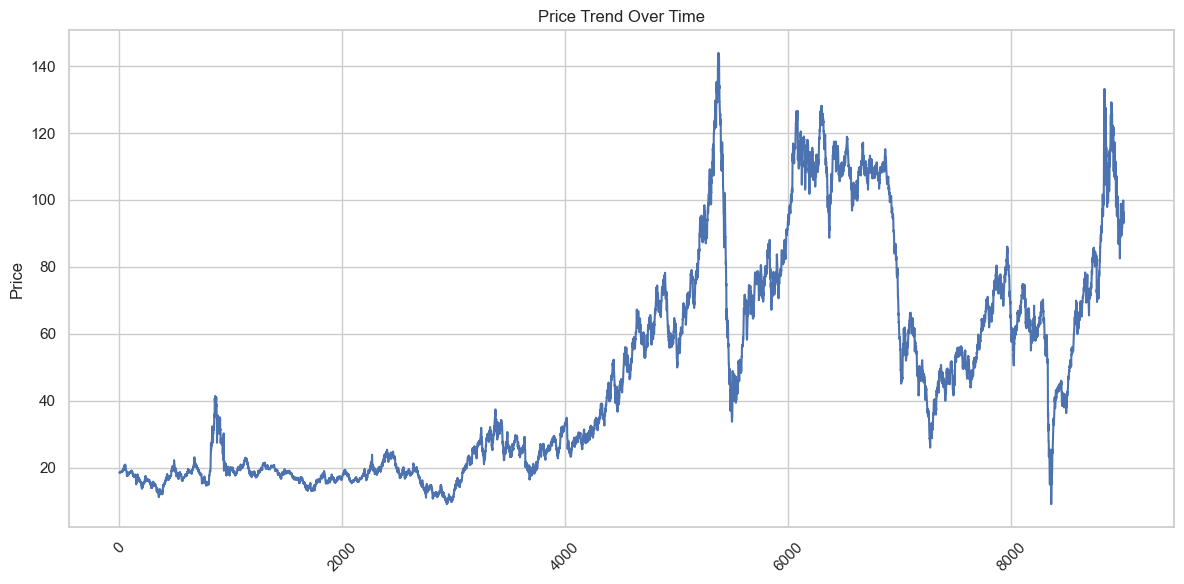

In [ ]:
# Plot the data
plots.plot_data(price)

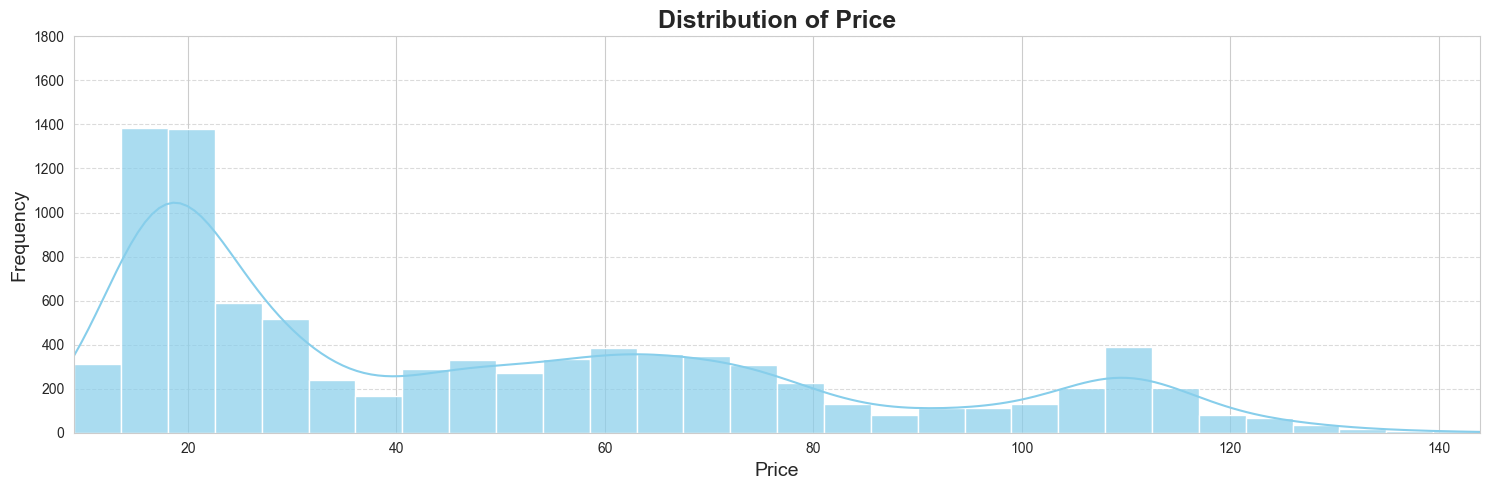

In [ ]:
plots.plot_distribution(price)

#### Check if the data is stationary or not using Augmented Dickey-Fuller (ADF) test

In [4]:
adf_result = adfuller(price['Price'])


print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values:
   1%: -3.4310783342658615
   5%: -2.861861876398633
   10%: -2.566941329781918


**Observation**
- ADF Statistic is higher than all the critical values at the 1%, 5%, and 10% significance levels. This means the ADF statistic is not sufficiently low to indicate stationarity.    
- p-value is well above the typical threshold of 0.05. This high p-value suggests that we fail to reject the null hypothesis, which assumes that the data is non-stationary.

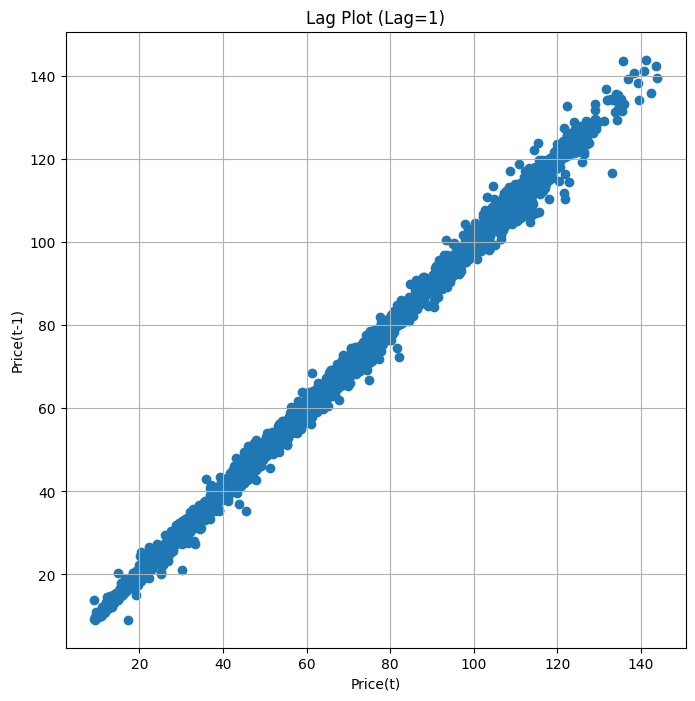

In [4]:
plots.lag_plot(price, 1)

**Observation**
- The plot show that there is a high corrlation betweeen todays price and the previous days price

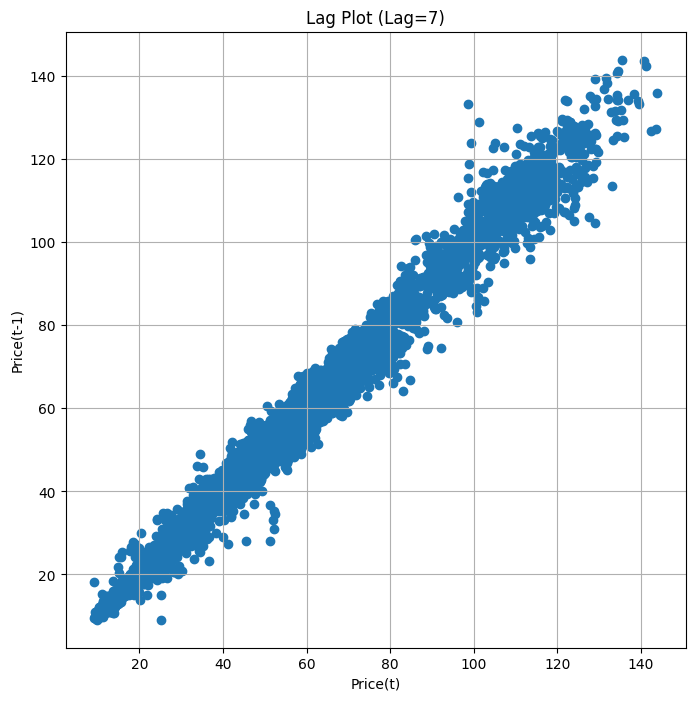

In [5]:
# lag for 7 days
plots.lag_plot(price, 7)

**Observation**
- The plot show that there is a high corrlation betweeen todays price and the previous 7 days price

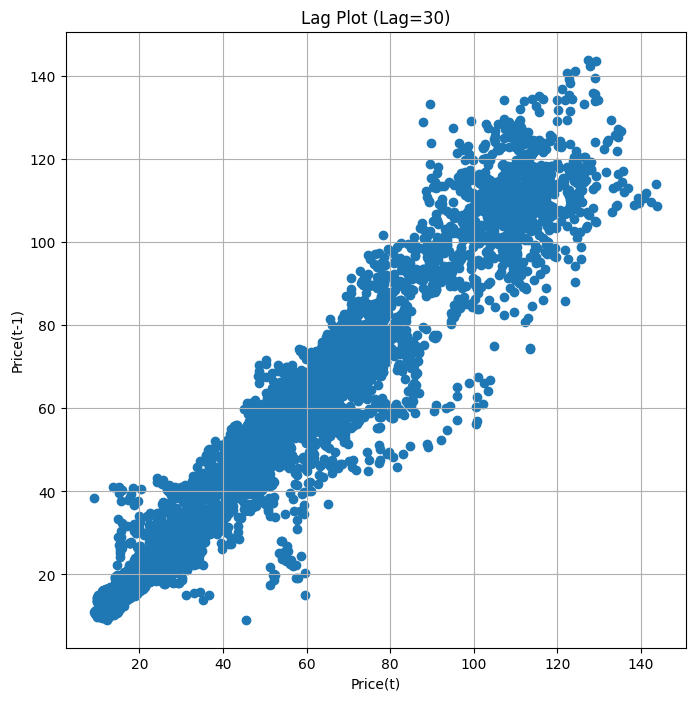

In [8]:
# lag for 30 days
plots.lag_plot(price, 30)

**Observation**
- Although there is a correlation between todays price and the last 30 days price the correlation is not that strong.

#### Feature engineering

In [ ]:
price = data_utils.add_features(price)

In [21]:
price.tail()

,Date,Price,SMA_week,SMA_month,SMA_quarter,SMA_semi_yearly,SMA_yearly,std_week,std_month,std_quarter,std_semi_yearly,std_yearly
9006,"Nov 08, 2022",96.85,96.575714,93.685333,98.542333,106.275333,92.706250,2.394910,2.984813,8.604836,11.679532,16.785277
9007,"Nov 09, 2022",93.05,96.540000,93.802000,98.222889,106.243778,92.765694,2.453059,2.884312,8.258402,11.707671,16.748352
9008,"Nov 10, 2022",94.25,96.415714,93.963333,98.042444,106.215778,92.827361,2.556840,2.762986,8.164240,11.730400,16.712697
9009,"Nov 11, 2022",96.37,96.458571,94.212333,97.907222,106.188444,92.894306,2.552590,2.624049,8.088854,11.747661,16.678355
9010,"Nov 14, 2022",93.59,96.215714,94.309333,97.687111,106.160833,92.950444,2.755134,2.541456,7.930515,11.771507,16.646471


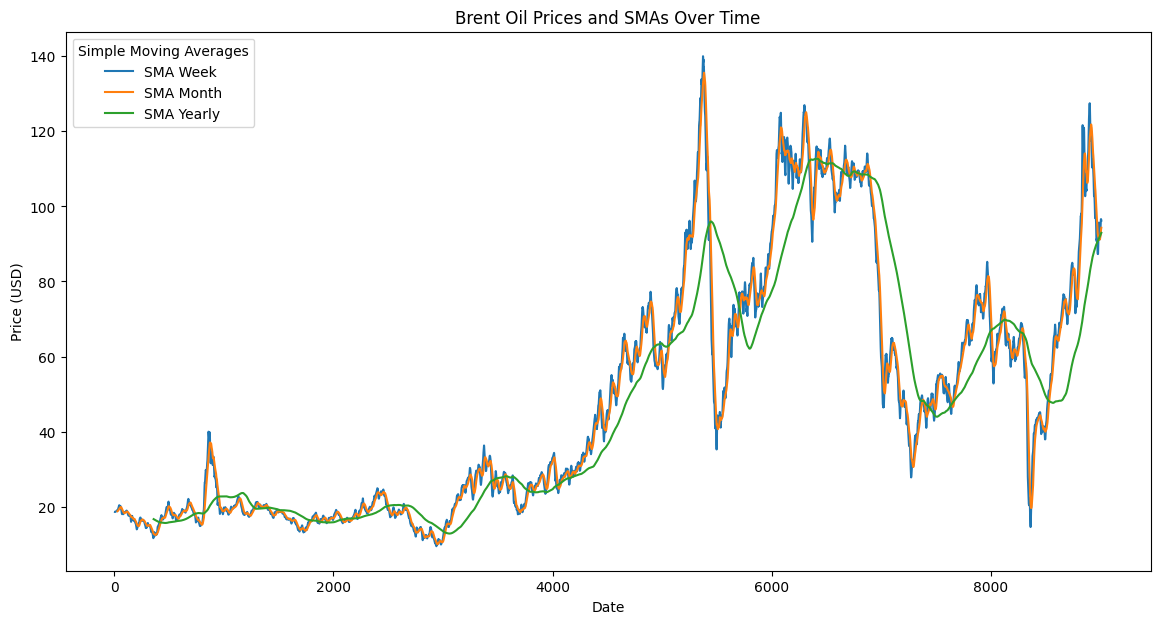

In [ ]:
plots.plot_ma(price, True)

**Interprtation**
- Trend Identification: The different SMAs can help identify trends in the oil price.
When the short-term SMA (SMA Week) is above the long-term SMA (SMA Yearly), it suggests an upward trend.
When the short-term SMA is below the long-term SMA, it suggests a downward trend.

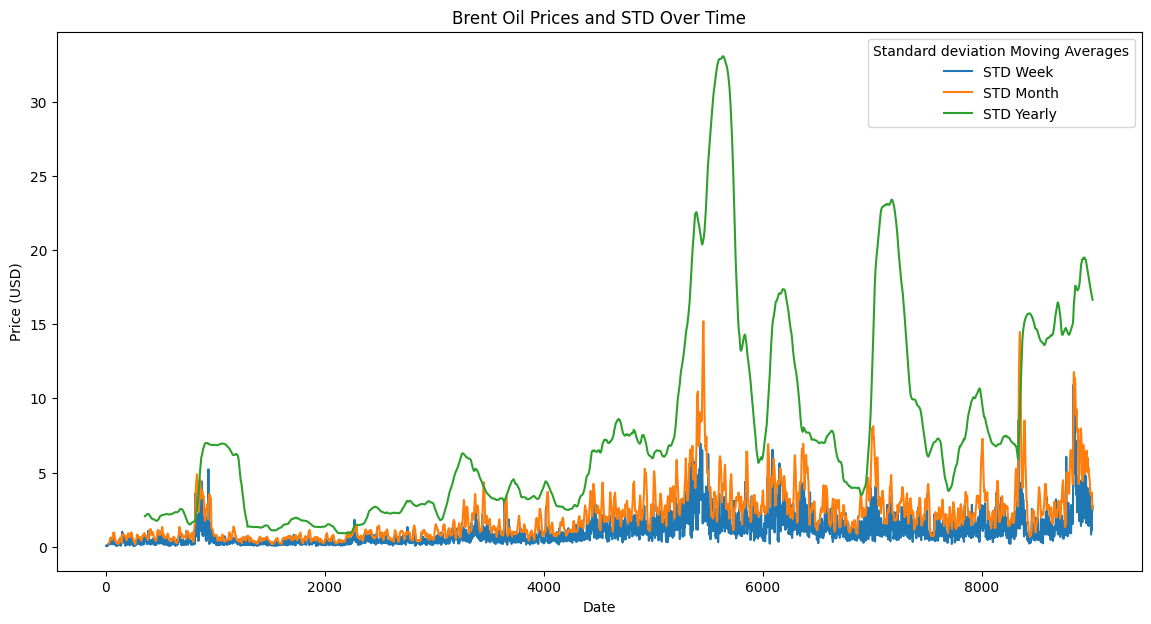

In [ ]:
plots.plot_ma(price, False)

**Observation**
- Seasonal Patterns: The seasonal standard deviation (STD Yearly) shows a clear seasonal pattern, with higher volatility during certain times of the year. This could be due to factors such as seasonal demand, geopolitical events, or weather conditions.
- Short-term vs. Long-term Volatility: The short-term standard deviations (STD Week and STD Month) are more volatile, reflecting the day-to-day and week-to-week price fluctuations. The long-term standard deviation (STD Yearly) is smoother, reflecting the overall trend in volatility.